<a href="https://colab.research.google.com/github/Raihan9525/Deep-Learning-Project/blob/main/ECE711_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question-1: Inner Product**

**Model Development Data Plot and Identifying Slope**

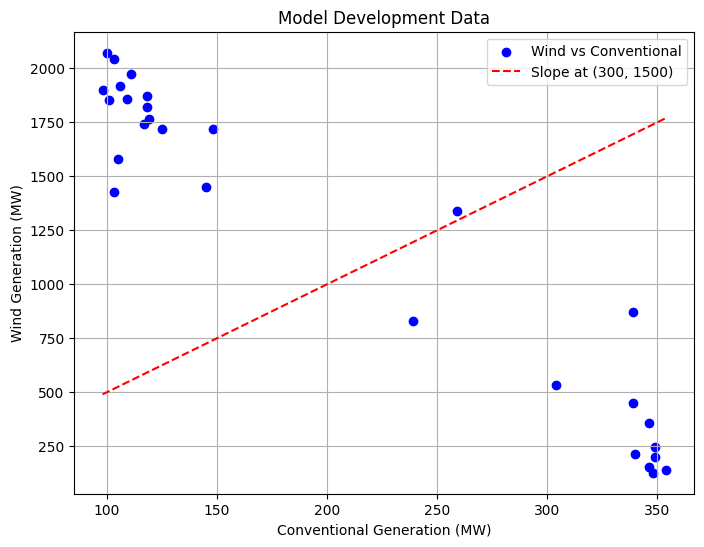

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Train Data
conventional_generation = [100, 111, 109, 101, 106, 103, 98, 105, 103, 145, 239, 304, 346, 349, 340, 346, 348, 354, 349, 339, 339, 259, 148, 118, 119, 117, 118, 125]
wind_generation = [2072, 1974, 1857, 1854, 1920, 2042, 1901, 1581, 1425, 1448, 831, 535, 357, 245, 212, 154, 127, 140, 199, 449, 871, 1340, 1721, 1822, 1766, 1743, 1873, 1717]

# Defining the slope and point
x0, y0 = 300, 1500
slope = 5

# Generating x values for the tangent line
x_vals = np.linspace(min(conventional_generation), max(conventional_generation), 100)
y_vals = slope * (x_vals - x0) + y0

# Ploting scatter points
plt.figure(figsize=(8,6))
plt.scatter(conventional_generation, wind_generation, color='b', label='Wind vs Conventional')

# Ploting slope line
plt.plot(x_vals, y_vals, 'r--', label=f'Slope at ({x0}, {y0})')

# Labels, title, and grid
plt.xlabel('Conventional Generation (MW)')
plt.ylabel('Wind Generation (MW)')
plt.title('Model Development Data')
plt.grid(True)
plt.legend()
plt.show()

**Testing the Model with Test Data**

In [3]:
import numpy as np
import pandas as pd

# Defining test data and xb as numpy arrays
data = np.array([[335, 349, 344, 345, 346, 349, 346, 348, 345, 349, 347, 349, 349, 348, 348, 347, 347, 335, 271, 163, 105, 114, 104], [191, 265, 454, 481, 592, 713, 776, 996, 1191, 1073, 657, 629, 826, 863, 913, 1057, 1254, 1524, 2003, 2235, 2402, 2419, 2257]])
xb = np.array([[1500], [300]])
x1 = np.array([[1], [-1]])

# Element-wise multiplication with [1; -1] equivalent in Python
x = x1 * data
result = np.dot(xb.T, x)

# Compute price_indicator
price_Indicator = result/abs(result)

# Append price_indicator to test data
Data_Out = np.vstack((data, price_Indicator))

# Create a DataFrame for better tabular visualization
df = pd.DataFrame(Data_Out.T, columns=["Conventional Generation", "Wind Generation", "Price Indicator"])

# Print the test data table
print(df.to_string(index=False))


 Conventional Generation  Wind Generation  Price Indicator
                   335.0            191.0              1.0
                   349.0            265.0              1.0
                   344.0            454.0              1.0
                   345.0            481.0              1.0
                   346.0            592.0              1.0
                   349.0            713.0              1.0
                   346.0            776.0              1.0
                   348.0            996.0              1.0
                   345.0           1191.0              1.0
                   349.0           1073.0              1.0
                   347.0            657.0              1.0
                   349.0            629.0              1.0
                   349.0            826.0              1.0
                   348.0            863.0              1.0
                   348.0            913.0              1.0
                   347.0           1057.0              1

**Plotting the Test Data**

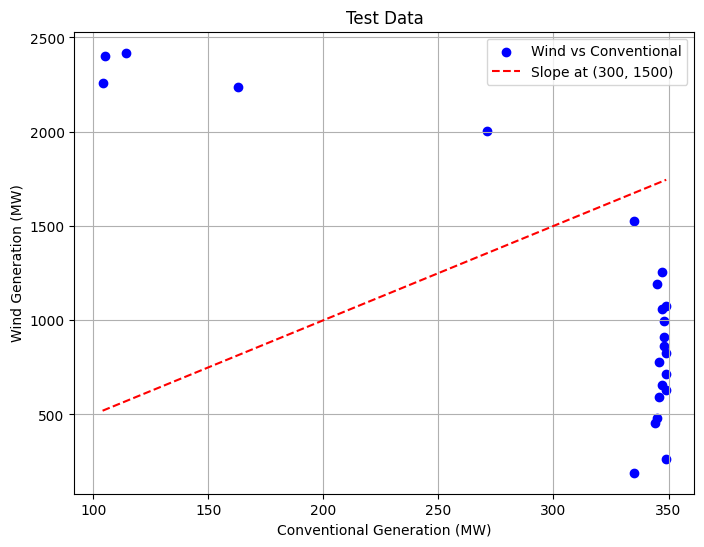

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Test Data
conventional_generation = [335, 349, 344, 345, 346, 349, 346, 348, 345, 349, 347, 349, 349, 348, 348, 347, 347, 335, 271, 163, 105, 114, 104]
wind_generation = [191, 265, 454, 481, 592, 713, 776, 996, 1191, 1073, 657, 629, 826, 863, 913, 1057, 1254, 1524, 2003, 2235, 2402, 2419, 2257]

# Define the slope and point
x0, y0 = 300, 1500
slope = 5

# Generating x values for the tangent line
x_vals = np.linspace(min(conventional_generation), max(conventional_generation), 100)
y_vals = slope * (x_vals - x0) + y0

# Plot scatter points
plt.figure(figsize=(8,6))
plt.scatter(conventional_generation, wind_generation, color='b', label='Wind vs Conventional')

# Plot slope line
plt.plot(x_vals, y_vals, 'r--', label=f'Slope at ({x0}, {y0})')

# Labels, title, and grid
plt.xlabel('Conventional Generation (MW)')
plt.ylabel('Wind Generation (MW)')
plt.title('Test Data')
plt.grid(True)
plt.legend()
plt.show()

**Question-2: Norm**

**Separating Data into two Clusters**

In [5]:
import numpy as np
import pandas as pd

# Define the train data
data = np.array([
    [100, 2072, -3.81], [111, 1974, -0.18], [109, 1857, -0.37], [101, 1854, -6.77],
    [106, 1920, 3.30], [103, 2042, 8.19], [98, 1901, 2.41], [105, 1581, 4.97],
    [103, 1425, 4.12], [145, 1448, 8.80], [239, 831, 78.57], [304, 535, 20.05],
    [346, 357, 21.10], [349, 245, 24.00], [340, 212, 22.25], [346, 154, 21.28],
    [348, 127, 18.96], [354, 140, 18.97], [349, 199, 24.49], [339, 449, 18.98],
    [339, 871, 16.02], [259, 1340, 10.83], [148, 1721, 10.52], [118, 1822, 2.64],
    [119, 1766, -2.05], [117, 1743, 0.89], [118, 1873, 6.30], [125, 1717, 10.88]
])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Conventional Generation (MW)", "Wind Generation (MW)", "Cost per Unit ($/MW)"])

# Separate clusters
high_cost = df[df["Cost per Unit ($/MW)"] >= 14]
low_cost = df[df["Cost per Unit ($/MW)"] < 14]

# Print results
print("\nHigh-Cost Cluster (Cost >= 14):")
print(high_cost.to_string(index=False))

print("\nLow-Cost Cluster (Cost < 14):")
print(low_cost.to_string(index=False))


High-Cost Cluster (Cost >= 14):
 Conventional Generation (MW)  Wind Generation (MW)  Cost per Unit ($/MW)
                        239.0                 831.0                 78.57
                        304.0                 535.0                 20.05
                        346.0                 357.0                 21.10
                        349.0                 245.0                 24.00
                        340.0                 212.0                 22.25
                        346.0                 154.0                 21.28
                        348.0                 127.0                 18.96
                        354.0                 140.0                 18.97
                        349.0                 199.0                 24.49
                        339.0                 449.0                 18.98
                        339.0                 871.0                 16.02

Low-Cost Cluster (Cost < 14):
 Conventional Generation (MW)  Wind Generation (

**Computing Centroid and Reference Distances**

In [6]:
# Compute centroids
high_cost_centroid = high_cost.iloc[:, :2].mean().values
low_cost_centroid = low_cost.iloc[:, :2].mean().values

print("High-Cost Cluster Centroid:", high_cost_centroid)
print("Low-Cost Cluster Centroid:", low_cost_centroid)

# Compute Euclidean distance from centroid to all points in the cluster
high_cost_distances = np.linalg.norm(high_cost.iloc[:, :2].values - high_cost_centroid, axis=1)
low_cost_distances = np.linalg.norm(low_cost.iloc[:, :2].values - low_cost_centroid, axis=1)

# Find reference distances (max distance from centroid)
high_cost_ref_distance = np.max(high_cost_distances)
low_cost_ref_distance = np.max(low_cost_distances)

print("High-Cost Cluster Reference Distance:", high_cost_ref_distance)
print("Low-Cost Cluster Reference Distance:", low_cost_ref_distance)

High-Cost Cluster Centroid: [332.09090909 374.54545455]
Low-Cost Cluster Centroid: [ 122.64705882 1768.        ]
High-Cost Cluster Reference Distance: 496.5026195697958
Low-Cost Cluster Reference Distance: 449.19497388937253


**Developing and Testing the Model Using Euclidian Norm**

In [11]:
def check_cluster_membership(data_points, high_cost_centroid, high_cost_ref_distance, low_cost_centroid, low_cost_ref_distance):
    # Compute distances from both centroids
    high_cost_distances = np.linalg.norm(data_points - high_cost_centroid, axis=1)
    low_cost_distances = np.linalg.norm(data_points - low_cost_centroid, axis=1)

    # Check membership conditions
    high_cost_membership = high_cost_distances <= high_cost_ref_distance
    low_cost_membership = low_cost_distances <= low_cost_ref_distance

    # Assign cluster based on which condition is satisfied
    cluster_labels = np.full(data_points.shape[0], "Unknown", dtype=object)
    cluster_labels[high_cost_membership] = "High Cost"
    cluster_labels[low_cost_membership] = "Low Cost"

    return cluster_labels, high_cost_distances, low_cost_distances

# Define the Train data
Train_data = np.array([
    [100, 2072, -3.81], [111, 1974, -0.18], [109, 1857, -0.37], [101, 1854, -6.77],
    [106, 1920, 3.30], [103, 2042, 8.19], [98, 1901, 2.41], [105, 1581, 4.97],
    [103, 1425, 4.12], [145, 1448, 8.80], [239, 831, 78.57], [304, 535, 20.05],
    [346, 357, 21.10], [349, 245, 24.00], [340, 212, 22.25], [346, 154, 21.28],
    [348, 127, 18.96], [354, 140, 18.97], [349, 199, 24.49], [339, 449, 18.98],
    [339, 871, 16.02], [259, 1340, 10.83], [148, 1721, 10.52], [118, 1822, 2.64],
    [119, 1766, -2.05], [117, 1743, 0.89], [118, 1873, 6.30], [125, 1717, 10.88]
])

# Convert to DataFrame
Train_df = pd.DataFrame(Train_data, columns=["Conventional Generation (MW)", "Wind Generation (MW)", "Cost per Unit ($/MW)"])

# Train Data points
train_data = Train_df.iloc[:, :2].values

# Assign clusters and get distances
Train_df["Cluster"], high_cost_distances, low_cost_distances = check_cluster_membership(
    train_data, high_cost_centroid, high_cost_ref_distance, low_cost_centroid, low_cost_ref_distance
)

# Add calculated distance column
Train_df["Distance"] = np.minimum(high_cost_distances, low_cost_distances)

# Print updated DataFrame with cluster assignment
print(Train_df)



# Define the Test data as a NumPy array
Test_data_array = np.array([[335, 191, 17.9943], [349, 265, 19.5111], [344, 454, 22.6636], [345, 481, 22.2361],
    [346, 592, 26.0889], [349, 713, 20.7727], [346, 776, 20.1297], [348, 996, 21.6375],
    [345, 1191, 20.367], [349, 1073, 23.1314], [347, 657, 24.8513], [349, 629, 19.7192],
    [349, 826, 19.9933], [348, 863, 21.9889], [348, 913, 18.5552], [347, 1057, 18.5948],
    [347, 1254, 17.8724], [335, 1524, 12.9217], [271, 2003, 7.3406], [163, 2235, 5.736],
    [105, 2402, 1.9529], [114, 2419, -1.4638], [104, 2257, -2.5498]])

# Convert to DataFrame
Test_df = pd.DataFrame(Test_data_array, columns=["Conventional Generation (MW)", "Wind Generation (MW)", "Cost per Unit ($/MW)"])

# Test Data points
test_data = Test_df.iloc[:, :2].values

# Assign clusters and get distances
Test_df["Cluster"], high_cost_distances, low_cost_distances = check_cluster_membership(
    test_data, high_cost_centroid, high_cost_ref_distance, low_cost_centroid, low_cost_ref_distance
)

# Add calculated distance column
Test_df["Distance"] = np.minimum(high_cost_distances, low_cost_distances)

# Print updated DataFrame with cluster assignment
print(Test_df)

    Conventional Generation (MW)  Wind Generation (MW)  Cost per Unit ($/MW)  \
0                          100.0                2072.0                 -3.81   
1                          111.0                1974.0                 -0.18   
2                          109.0                1857.0                 -0.37   
3                          101.0                1854.0                 -6.77   
4                          106.0                1920.0                  3.30   
5                          103.0                2042.0                  8.19   
6                           98.0                1901.0                  2.41   
7                          105.0                1581.0                  4.97   
8                          103.0                1425.0                  4.12   
9                          145.0                1448.0                  8.80   
10                         239.0                 831.0                 78.57   
11                         304.0        